## How do sentiments towards COVID-19 vaccine compare before and after the emergence of the Omicron variant in the Arab world?
### A Twitter comparative sentiment analysis of the pre-Omicron and post-Omicron phases by Arabic users.

### Dependency - The analysis leverages CAMeL Tools
### CAMeL Tools is a suite of Arabic natural language processing tools developed by the CAMeL Lab at New York University Abu Dhabi.
#### pip3 install camel_tools

In [1]:
from camel_tools.utils.normalize          import normalize_alef_maksura_ar
from camel_tools.utils.normalize          import normalize_alef_ar
from camel_tools.utils.normalize          import normalize_teh_marbuta_ar
from camel_tools.utils.normalize          import normalize_unicode
from camel_tools.dialectid                import DialectIdentifier
from camel_tools.sentiment                import SentimentAnalyzer
from camel_tools.utils.dediac             import dediac_ar
from camel_tools.morphology.database      import MorphologyDB
from camel_tools.morphology.analyzer      import Analyzer
from camel_tools.tokenizers.word          import simple_word_tokenize
from camel_tools.disambig.mle             import MLEDisambiguator
from camel_tools.tokenizers.morphological import MorphologicalTokenizer
import os

os.environ["CAMELTOOLS_DATA"] = "~/.camel_tools"


text = 'ﷺ'

sentence = "sentence from tweet"

sent_norm = normalize_unicode(sentence)


# Normalize alef variants to 'ا'
sent_norm = normalize_alef_ar(sentence)

# Normalize alef maksura 'ى' to yeh 'ي'
sent_norm = normalize_alef_maksura_ar(sent_norm)

# Normalize teh marbuta 'ة' to heh 'ه'
sent_norm = normalize_teh_marbuta_ar(sent_norm)


In [2]:
# Load the morphological database.
# The MorphologyDB database is used for analyzing modern Standard Arabic. 
db = MorphologyDB.builtin_db()

analyzer = Analyzer(db)

analyses = analyzer.analyze('موظف')

In [3]:
from camel_tools.tokenizers.word import simple_word_tokenize
from camel_tools.disambig.mle import MLEDisambiguator
from camel_tools.tokenizers.morphological import MorphologicalTokenizer
import arabicstopwords.arabicstopwords as stp
# The tokenizer expects pre-tokenized text
sentence = simple_word_tokenize("sentence from tweet")

# Load a pretrained disambiguator to use with a tokenizer
mle = MLEDisambiguator.pretrained('calima-msa-r13')

# Without providing additional arguments, the tokenizer will output undiacritized
# morphological tokens for each input word delimited by an underscore.
tokenizer = MorphologicalTokenizer(mle, scheme='d3tok')
tokens = tokenizer.tokenize(sentence)

# By specifying `split=True`, the morphological tokens are output as seperate
# strings.
tokenizer = MorphologicalTokenizer(mle, scheme='d3tok', split=True)
tokens = tokenizer.tokenize(sentence)

# We can output diacritized tokens by setting `diac=True`
tokenizer = MorphologicalTokenizer(mle, scheme='d3tok', split=True, diac=True)
tokens = tokenizer.tokenize(sentence)

## Import raw data
### Please see Data_by_day notebook for the method by which the pre and post files were created
#### Tweets using the keywords “لقاحات” or “تطعيم” or “لقاح” or “تطعيمات”  - ”vaccines”, “inoculation”, ”vaccine”, “inoculations” 

In [12]:
import pandas as pd
#df1_tweets = pd.read_csv('put_your_file_location_for_pre_omicron.csv', index_col=0)
raw_tweets_pre = pd.read_csv('tweet_data_by_day.csv', index_col=0)
raw_tweets_pre = raw_tweets_pre[ raw_tweets_pre['text'].str.startswith('RT') == False ]

#df2_tweets = pd.read_csv('put_your_file_location_for_post_omicron.csv', index_col=0)
raw_tweets_post = pd.read_csv('tweet_data_by_day_post_omicron.csv', index_col=0)
raw_tweets_post = raw_tweets_post[ raw_tweets_post['text'].str.startswith('RT') == False ]

### Sentiment Analysis

#### Sentiments by City

In [ ]:
from datetime import datetime
did = DialectIdentifier.pretrained()
sa = SentimentAnalyzer.pretrained()

t1 = datetime.now()

raw_tweets_pre[ 'Sentiment' ] = raw_tweets_pre['text'].apply( lambda x: sa.predict(  [ x ] )[ 0 ] )
raw_tweets_pre[ 'Label' ]     = raw_tweets_pre['text'].apply( lambda x: did.predict( [ x ] )[ 0 ].top )

# Read the CAMeL Tools Dialect Identifier locations document saved on your computer (locations contains labels for cities identified by CAMeL Tools dialect identifier )
loc = pd.read_csv( '/your_directory/locations.csv' );  
raw_tweets_pre = raw_tweets_pre.merge( loc, on ='Label' )

raw_tweets_pre.to_csv('Raw_tweets_plus_sentiments_pre.csv', index = False )

print(datetime.now() - t1)


1:35:55.283826


In [ ]:
t1 = datetime.now()

raw_tweets_post[ 'Sentiment' ] = raw_tweets_post['text'].apply( lambda x: sa.predict(  [ x ] )[ 0 ] )
raw_tweets_post[ 'Label' ]     = raw_tweets_post['text'].apply( lambda x: did.predict( [ x ] )[ 0 ].top )

# Read the CAMeL Tools Dialect Identifier label document saved on your computer location
loc = pd.read_csv( '/your_directory/locations.csv' );  
raw_tweets_post = raw_tweets_post.merge( loc, on ='Label' )

raw_tweets_post.to_csv('Raw_tweets_plus_sentiments_post.csv', index = False )

print(datetime.now() - t1)

9:36:22.350924


In [ ]:
import pandas as pd

df1_tweets = pd.read_csv('Raw_tweets_plus_sentiments_pre.csv');

df2_tweets = pd.read_csv('Raw_tweets_plus_sentiments_post.csv')


### Plot sentiments Pre and Post Omicron

In [8]:
#create a matrix of sentiments by city
import matplotlib.pyplot as plt
from collections import Counter
import pprint as pp
titles = ['sentiment', 'city', 'country', 'region'] 
sentiment_type = ['positive', 'negative', 'neutral'] 

def build_matrix(sentiments):
    matrix = {}

    for row in sentiments.values.astype(str).tolist():
        if not matrix.get(row[0]):
            matrix[ row[0] ] = {}

        if not matrix[ row[0] ].get( row[1] ) :
            matrix[ row[0] ] [ row[1] ] = {}
            matrix[ row[0] ] [ row[1] ] = 1      
        else:
            matrix[ row[0] ] [ row[1] ] += 1      
            
    return(matrix)

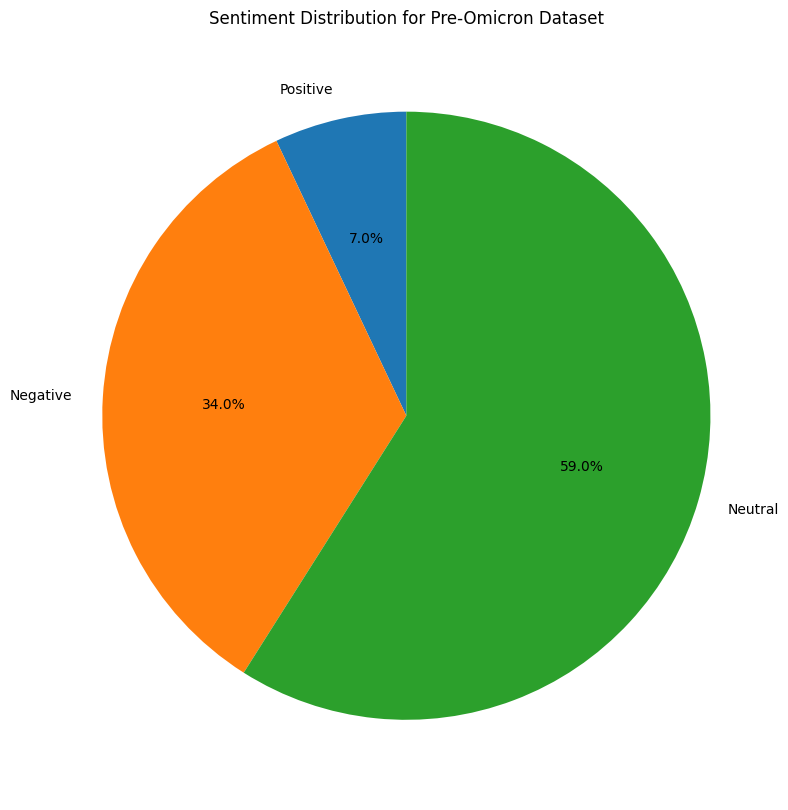

In [9]:
FIGS_PATH='.'
df1_tweets = pd.read_csv('Raw_tweets_plus_sentiments_pre.csv', low_memory=False);
df1_tweets = pd.DataFrame( build_matrix( df1_tweets[['Sentiment','City']] ))

#plot sentiment distriution for pre-Omicron tweets
sentiment_counts = (df1_tweets['positive'].sum(), df1_tweets['negative'].sum(), df1_tweets['neutral'].sum())
labels=["Positive","Negative", "Neutral"]
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90 )
ax1.axis('equal')  
plt.tight_layout()
plt.title('Sentiment Distribution for Pre-Omicron Dataset')
plt.savefig("sentiment1.png")
plt.show()


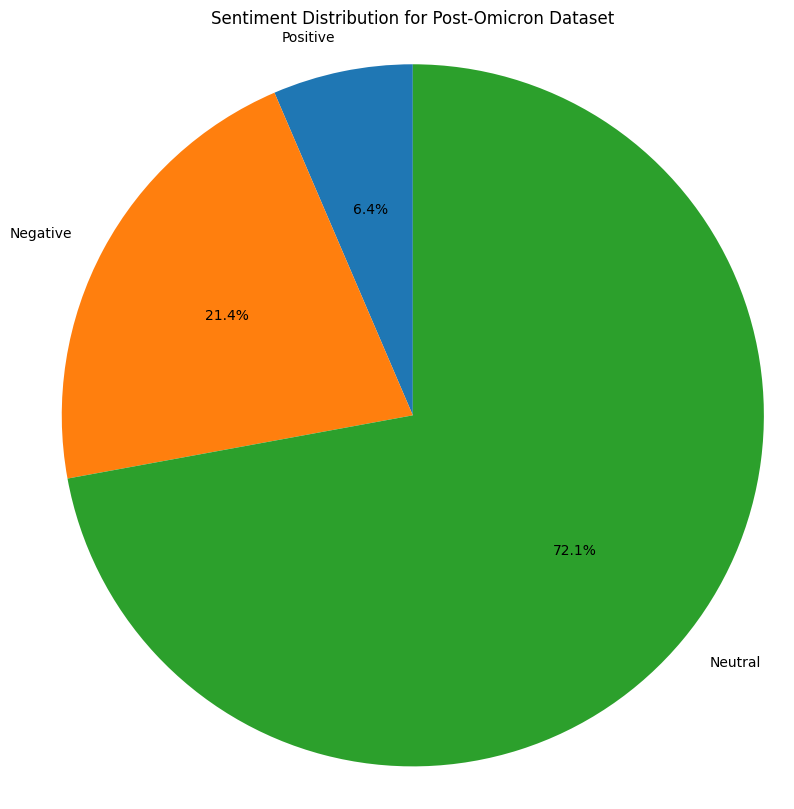

In [10]:
FIGS_PATH='.'
df2_tweets = pd.read_csv('Raw_tweets_plus_sentiments_post.csv', low_memory=False);
df2_tweets = pd.DataFrame( build_matrix( df2_tweets[['Sentiment','City']] ))

#plot sentiment distriution for pre-Omicron tweets
sentiment_counts = (df2_tweets['positive'].sum(), df2_tweets['negative'].sum(), df2_tweets['neutral'].sum())
labels=["Positive","Negative", "Neutral"]
fig1, ax1 = plt.subplots(figsize=(8, 8))
ax1.pie(sentiment_counts, labels=labels, autopct='%1.1f%%', shadow=False, startangle=90 )
ax1.axis('equal')  
plt.tight_layout()
plt.title('Sentiment Distribution for Post-Omicron Dataset')
plt.savefig("sentiment2.png")
plt.show()

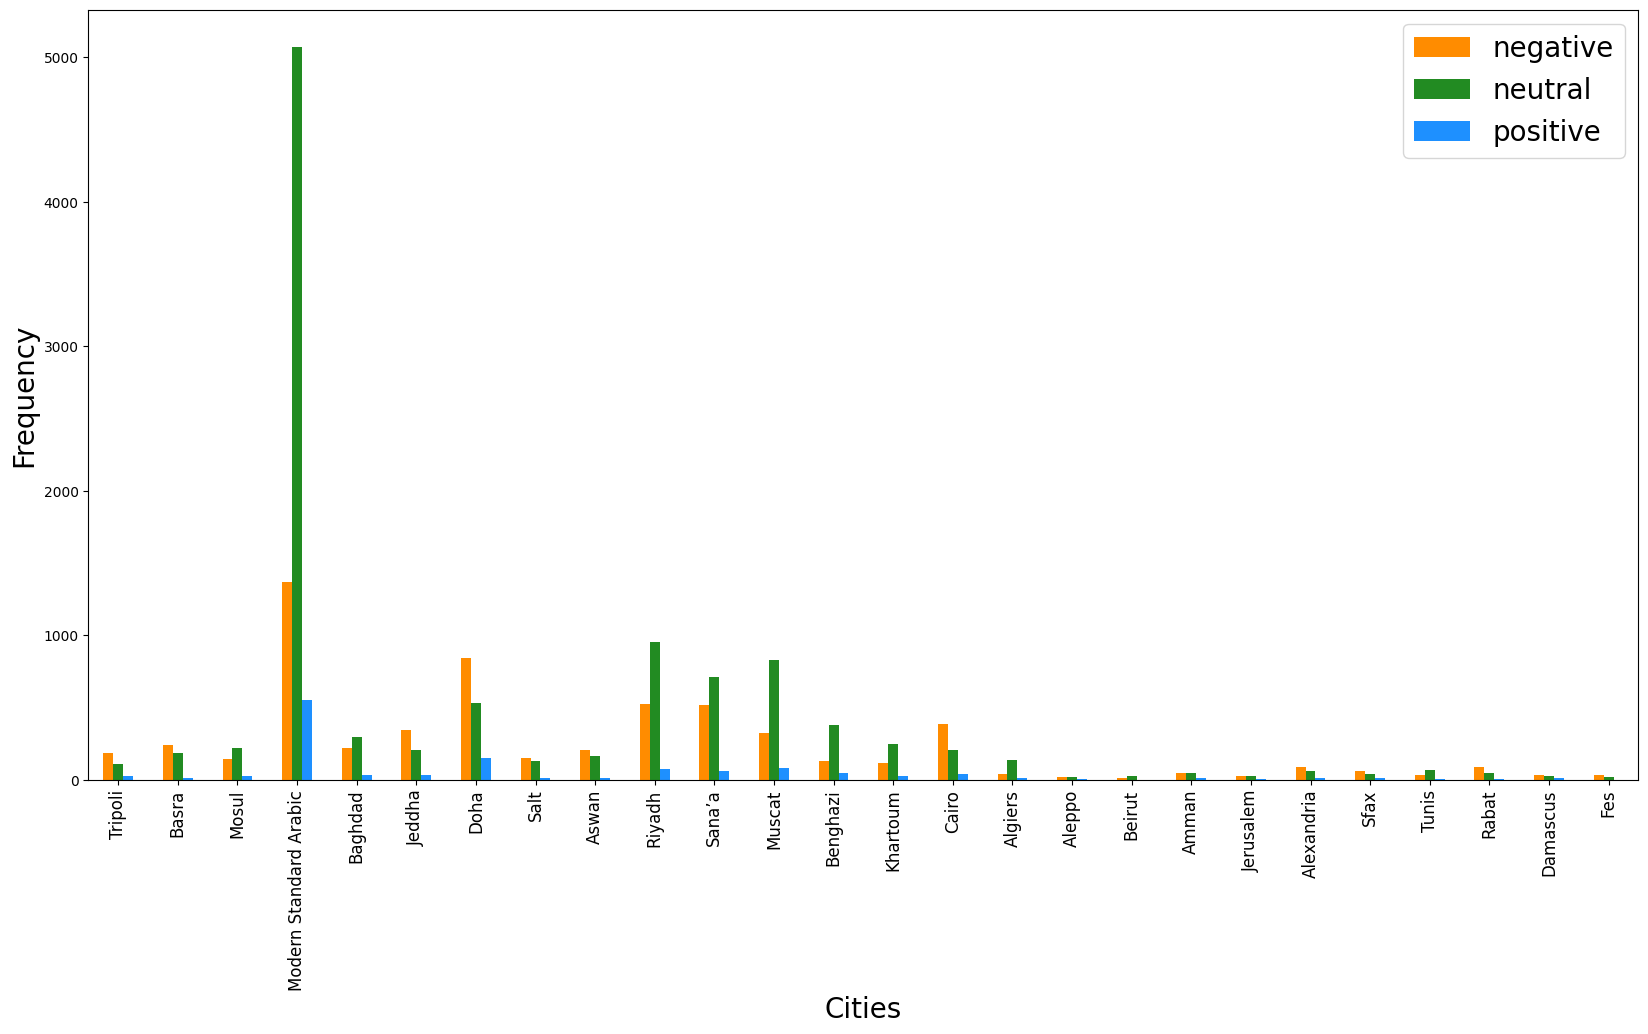

0:00:00.920837


In [11]:
#FIGS_PATH='Insert_Your_Fig_Path'

FIGS_PATH='.'

# Creating a data frame using pandas to compare the occurrence of each sentiment by city for the X corpus
from datetime import datetime

df1_tweets = pd.DataFrame( build_matrix( df1_tweets[['Sentiment','City']] ))

t = datetime.now()
ax= df1_tweets.plot.bar(color = ('#FF8C00','#228B22', '#1E90FF'), figsize=(20, 10))
ax.set_xlabel('Cities', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=12)
plt.legend(fontsize = 20)
plt.savefig(FIGS_PATH+"/sentiments_by_city_pre.png")
plt.show()

print(datetime.now() - t)


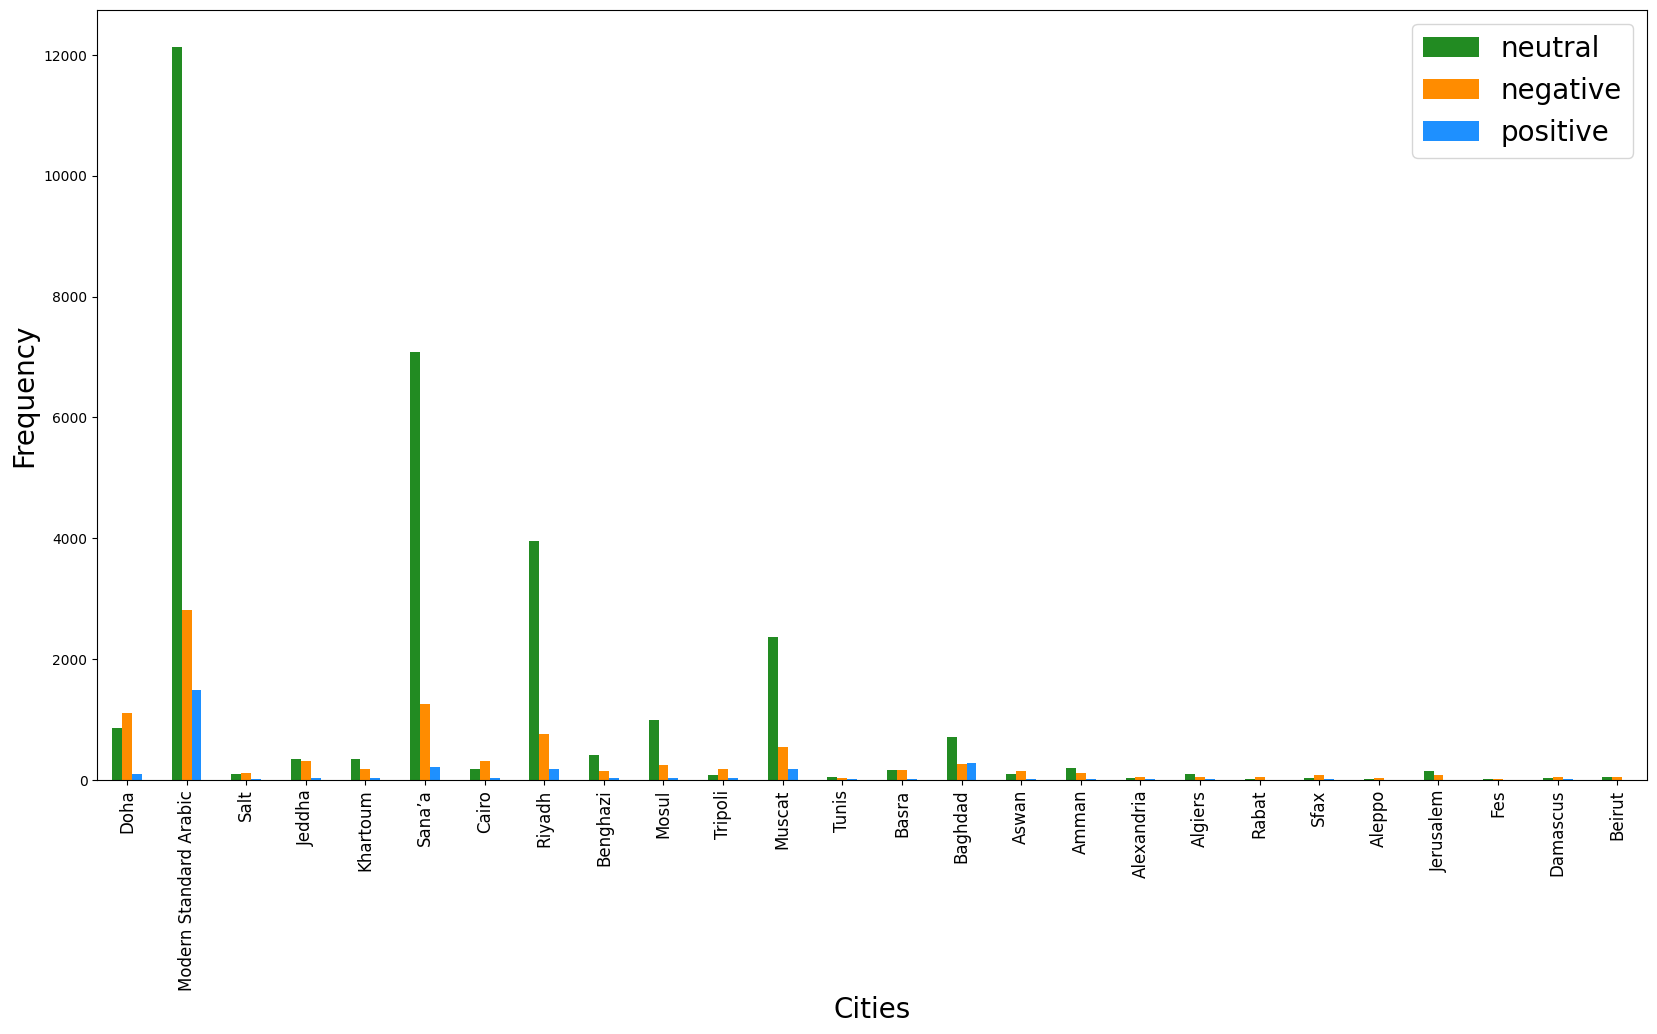

0:00:00.836185


In [14]:
#FIGS_PATH='Insert_Your_Fig_Path'

FIGS_PATH='.'

# Creating a data frame using pandas to compare the occurrence of each sentiment by city for the X corpus
from datetime import datetime

df2_tweets = pd.DataFrame( build_matrix( df2_tweets[['Sentiment','City']] ))

t = datetime.now()
ax= df2_tweets.plot.bar(color = ('#228B22','#FF8C00', '#1E90FF'), figsize=(20, 10))
ax.set_xlabel('Cities', fontsize=20)
ax.set_ylabel('Frequency', fontsize=20)
plt.xticks(fontsize=12)
plt.legend(fontsize = 20)
plt.savefig(FIGS_PATH+"/sentiments_by_city_post.png")
plt.show()

print(datetime.now() - t)

### Processing

In [9]:
#add Arabic stopwords from this file
with open('ar_stopwords.txt', 'r') as file:
    stopwords = file.read()

In [10]:
from camel_tools.utils.normalize import normalize_unicode
#remove stopwords and all characters that are not arabic letters or # numbers and lemmatize the words
def preprocess_ar(text):
    processedText = []
    
    my_stp = stp.stopwords_list() + [ u'كورونا', u'ان' ]

    # Create Lemmatizer and Stemmer.
    st = ISRIStemmer()

    for t in text:
        t = ''.join(c for c in t if ud.category(c) == 'Lo' or ud.category(c) == 'Nd' or c == ' ')
   
        commentwords = ''
        for word in t.split():
            # Checking if the word is a stopword.

            if word not in my_stp:
                if len(word)>1:
                    # Lemmatizing the word.
                    word = st.suf32(word)
                    commentwords += (word+' ')
        processedText.append(normalize_unicode(commentwords))
    
    return processedText  

In [ ]:
from nltk.stem.isri import ISRIStemmer
import unicodedata as ud
import arabicstopwords.arabicstopwords as stp

processedtext_ar1 = preprocess_ar( df1_tweets.text )
processedtext_ar2 = preprocess_ar( df2_tweets.text )


### Analysis

In [ ]:
#Some imports were already imported above, but repeated here to note that they are needed in this section
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from ar_wordcloud import ArabicWordCloud
import nltk

### Visualization
#### Word Cloud

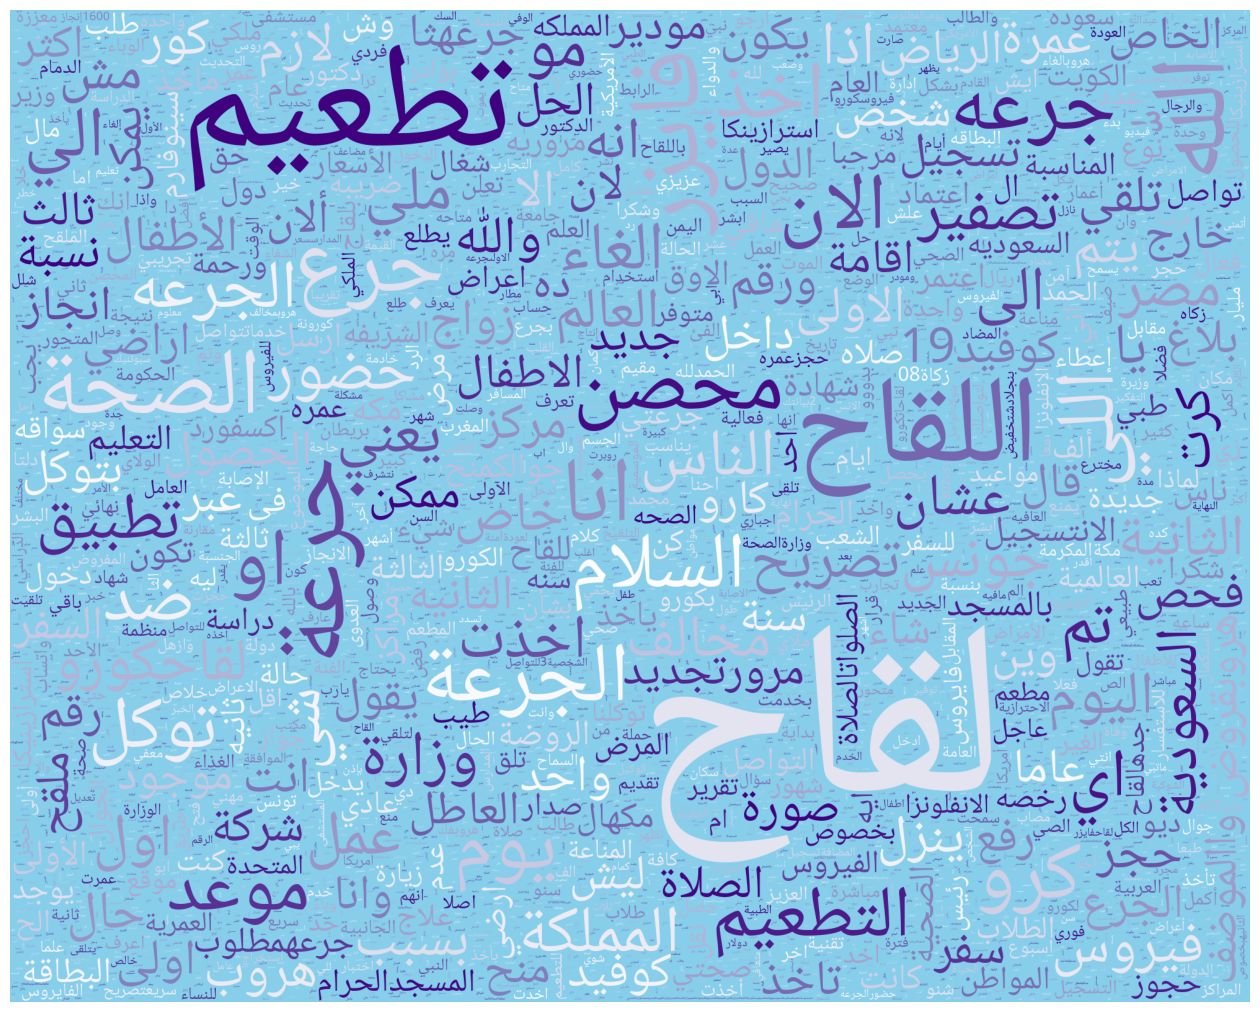

In [22]:
#Add Arabic stopwords to the natural language toolkit
stopwords = nltk.corpus.stopwords.words('arabic')
stopwords.extend(['Arabic stopwords'])
stopwords.append( stopwords)

#plot Arabic wordcloud
awc = ArabicWordCloud(width=2000,height=1600,max_font_size=400,max_words=10000,collocations=False, background_color='skyblue', colormap="Purples")
plt.figure(figsize=(16,16))
#save figure
wc_ar = awc.from_text(u''.join(processedtext_ar1))
plt.axis("off")
plt.imshow(wc_ar)
plt.savefig("WC1.png")



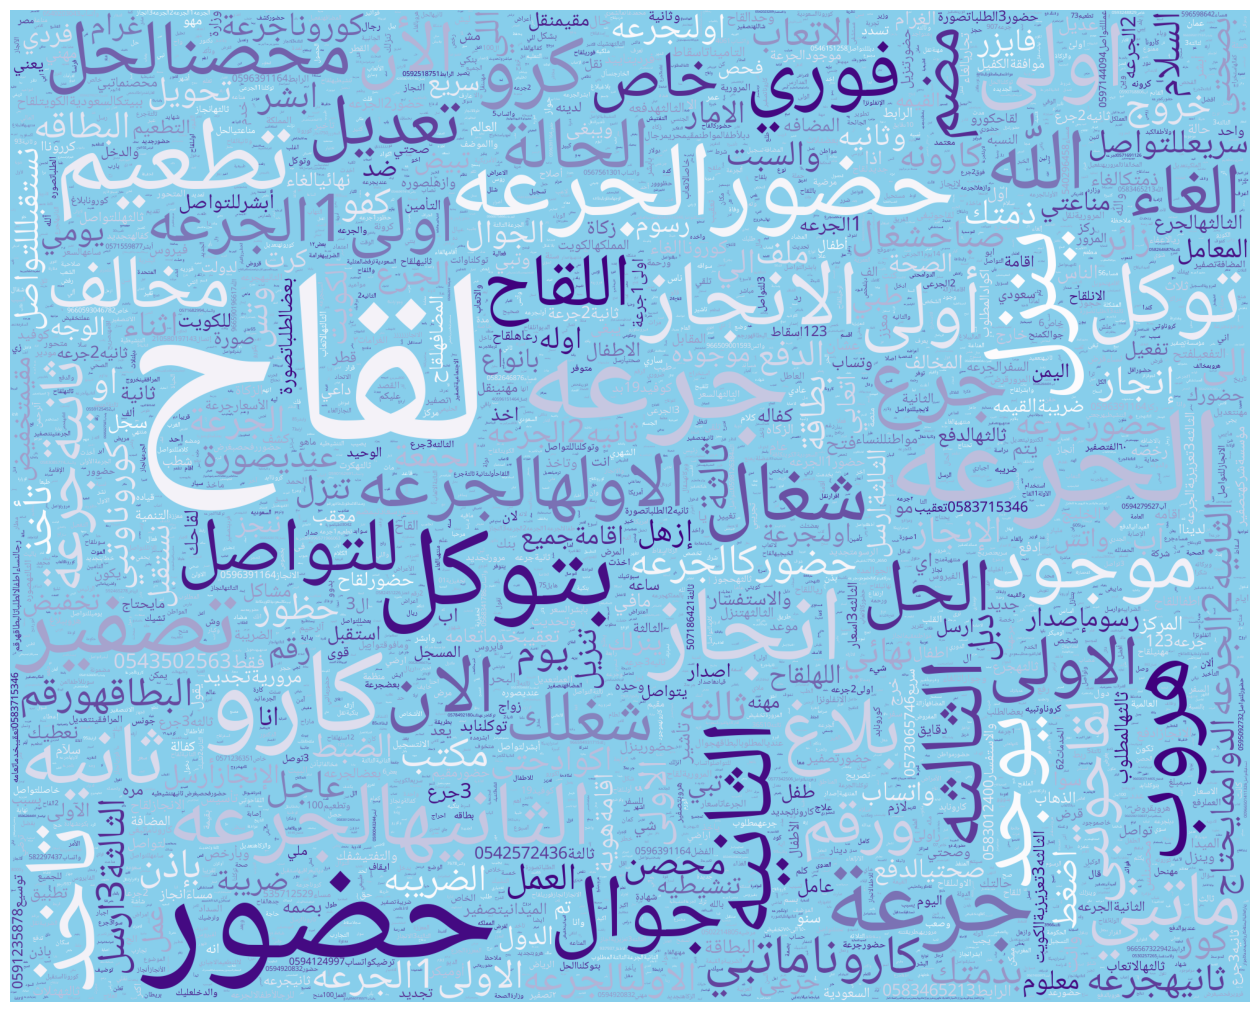

In [23]:
awc = ArabicWordCloud(width=2000,height=1600,max_font_size=400,max_words=10000,collocations=False, background_color='skyblue', colormap="Purples")
plt.figure(figsize=(16,16))
wc_ar = awc.from_text(u''.join(processedtext_ar2))
plt.axis("off")
plt.imshow(wc_ar)
plt.savefig("WC2.png")



### Frequencies

In [26]:
#count the most common words found in tweets 
counts = dict()
for i in range(0,len(processedtext_ar1)):
    for word in processedtext_ar1[i].split(' '):
        if  not counts.get(''.join(reversed(word))):
            counts[ u''.join(reversed(word)) ] = 1
        else:
            counts[ u''.join(reversed(word)) ] += 1
            

In [ ]:
import seaborn as sns
import pandas as pd
import arabic_reshaper
from bidi.algorithm import get_display
import matplotlib.pyplot as plt
res=dict(counts[0:50])
print(res)
#print(type(res))
res2 = {get_display(arabic_reshaper.reshape(k)): v for k,v in res.items()}

df = pd.DataFrame(res2.items(), columns=['word', 'count'])

sns.set(style="whitegrid")
sns.set_theme(rc={'figure.figsize':(11.7,8.27)})
ax = sns.barplot(x="count", y="word", data=df)


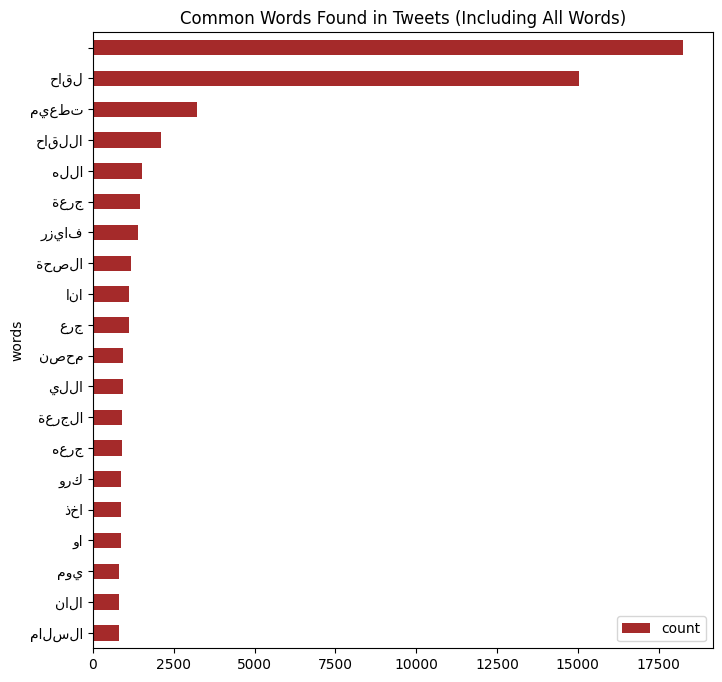

     words  count
0           18269
1     حاقل  15031
2    ميعطت   3217
3   حاقللا   2102
4     هللا   1520
5     ةعرج   1448
6    رزياف   1389
7    ةحصلا   1168
8      انا   1108
9      عرج   1106
10    نصحم    935
11    يللا    931
12  ةعرجلا    913
13    هعرج    897
14     ورك    872
15     ذخا    864
16      وا    861
17     موي    822
18    نالا    818
19  مالسلا    802


In [ ]:
#plot the most common words found in tweets in Arabic for pre-Omicron tweets
new_vocab1 = Counter( counts )

fig, ax = plt.subplots(figsize=(8, 8))

clean_tweets = pd.DataFrame(new_vocab1.most_common(20), columns=['words', 'count'])
clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="brown")

ax.set_title("Common Words Found in Tweets (Including All Words)")
plt.show()
print(clean_tweets)


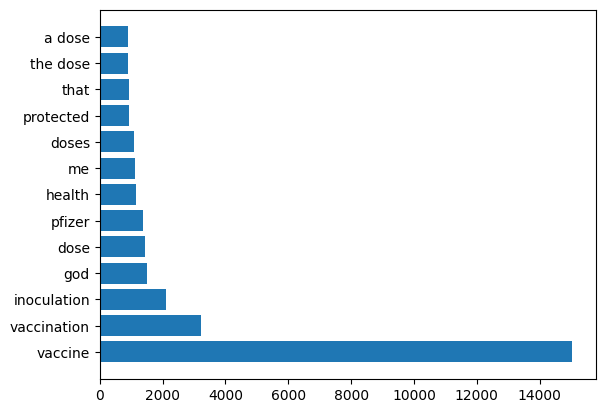

In [35]:
#Most Common Words translated to English for pre-Omicon tweets
my_dict1= {u'vaccine':15031, u'vaccination': 3217, u'inoculation':2102, u'god':1520, u'dose': 1448, u'pfizer': 1389, u'health': 1168, u'me':1108, u'doses': 1106, u'protected': 935, u'that':931, u'the dose': 913, u'a dose':897   }
plt.barh(*zip(*my_dict1.items()))
plt.savefig("most_common_words1.png")
plt.show()



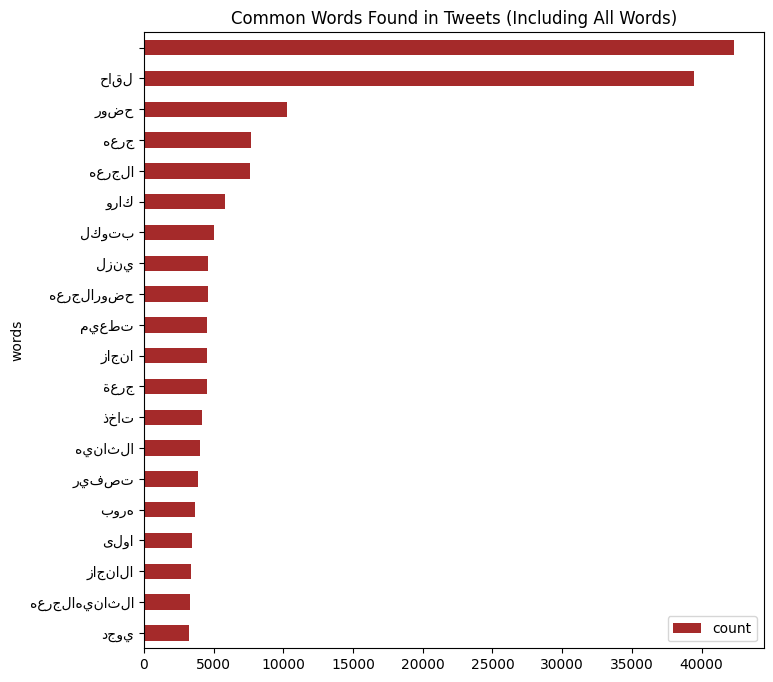

In [30]:
#count and plot the most common words found in tweets for post-Omicron tweets
counts = dict()
for i in range(0,len(processedtext_ar2)):
    for word in processedtext_ar2[i].split(' ') :

        if  not counts.get(''.join(reversed(word))):
            counts[ ''.join(reversed(word)) ] = 1
        else:
            counts[ ''.join(reversed(word)) ] += 1

new_vocab2 = Counter( counts )
         
fig, ax = plt.subplots(figsize=(8, 8))

clean_tweets = pd.DataFrame(new_vocab2.most_common(20), columns=['words', 'count'])
clean_tweets.sort_values(by='count').plot.barh(x='words',
                      y='count',
                      ax=ax,
                      color="brown")

ax.set_title("Common Words Found in Tweets (Including All Words)")
plt.show()


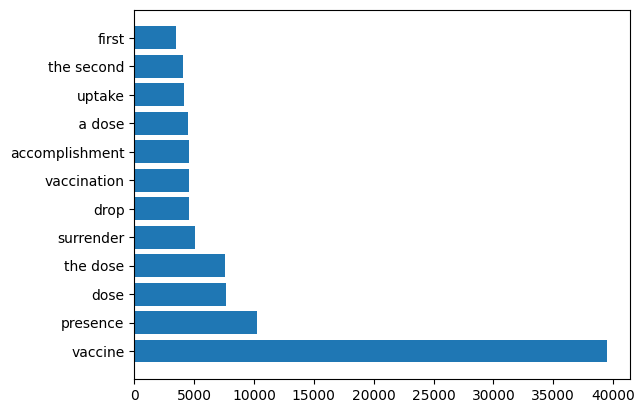

In [31]:
#Most Common Words translated to English for post-Omicon tweets
my_dict2= {u'vaccine':39470, u'presence': 10241, u'dose':7687, u'the dose':7610, u'surrender': 5067, u'drop': 4577, u'vaccination': 4543, u'accomplishment':4532, u' a dose': 4505, u'uptake':4169, u'the second': 4035, u'first':3484   }

plt.barh(*zip(*my_dict2.items()))
plt.savefig("most_common_words2.png")
plt.show()

